In [1]:
#Mission: It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 
#Submissions are evaluated on Root-Mean-Squared-Error (RMSE)between the logarithm of the predicted value and the logarithm of the observed sales price.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [4]:
#unprocessed data を取得
df_train = pd.read_csv('unpro_train.csv')

#表示する列数を変更（デフォルトだと全部表示してくれなかった）
pd.set_option("display.max_columns", 300)

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
#category data のエンコーディング
print(df_train.select_dtypes(include=['object']).columns.values)
print("個数は{}".format(len(df_train.select_dtypes(include=['object']).columns.values)))

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']
個数は43


In [9]:
#Qualityなど、序列がありそうなやつはmapping
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [10]:
print(df_train.select_dtypes(include=['object']).columns.values)
print("個数は{}".format(len(df_train.select_dtypes(include=['object']).columns.values)))

['MSZoning' 'LandContour' 'LotConfig' 'Neighborhood' 'Condition1'
 'Condition2' 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'Foundation' 'Heating' 'CentralAir'
 'Electrical' 'GarageType' 'GarageFinish' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']
個数は23


In [11]:
#残りはダミー変数化
df_train = pd.get_dummies(df_train,drop_first = True)
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,2,NaN,4,4,3,7,5,2003,2003,196.0,4,3,4.0,3.0,0.0,6.0,706,1.0,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,NaN,2003.0,2,548,3.0,3.0,2,0,61,0,0,0,0,NaN,0,2,2008,208500,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,2,NaN,4,4,3,6,8,1976,1976,0.0,3,3,4.0,3.0,3.0,5.0,978,1.0,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3.0,1976.0,2,460,3.0,3.0,2,298,0,0,0,0,0,NaN,0,5,2007,181500,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [14]:
#欠損値の概要把握
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
PoolQC,1453,0.995205
Alley,1369,0.937671
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageYrBlt,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtFinType1,37,0.025342


In [16]:
#欠損が多すぎるのは消去
df_train = df_train.drop(["PoolQC","Alley","FireplaceQu"], axis=1)

In [17]:
df_train.loc[:,['LotFrontage','GarageCond','GarageQual','BsmtExposure',
                'GarageYrBlt','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea']].describe()

,LotFrontage,GarageCond,GarageQual,BsmtExposure,GarageYrBlt,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea
count,1201.000000,1379.000000,1379.000000,1422.000000,1379.000000,1422.000000,1423.000000,1423.000000,1423.000000,1452.000000
mean,70.049958,2.973894,2.975344,0.673699,1978.506164,1.280591,3.638089,3.011244,3.579761,103.685262
std,24.284752,0.239527,0.248598,1.047297,24.689725,0.880249,2.054910,0.287846,0.680602,181.066207
min,21.000000,1.000000,1.000000,0.000000,1900.000000,1.000000,1.000000,1.000000,2.000000,0.000000
25%,59.000000,3.000000,3.000000,0.000000,1961.000000,1.000000,1.000000,3.000000,3.000000,0.000000
50%,69.000000,3.000000,3.000000,0.000000,1980.000000,1.000000,4.000000,3.000000,4.000000,0.000000
75%,80.000000,3.000000,3.000000,1.000000,2002.000000,1.000000,6.000000,3.000000,4.000000,166.000000
max,313.000000,5.000000,5.000000,3.000000,2010.000000,6.000000,6.000000,4.000000,5.000000,1600.000000


In [18]:
#それぞれ妥当な値を補完
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].mean())
df_train["GarageCond"] = df_train["GarageCond"].fillna(3)
df_train["GarageQual"] = df_train["GarageQual"].fillna(3)
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna(1)
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna(1)
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna(4)
df_train["BsmtCond"] = df_train["BsmtCond"].fillna(3)
df_train["BsmtQual"] = df_train["BsmtQual"].fillna(4)
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

In [19]:
#欠損値の概要把握
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
SaleCondition_Partial,0,0.0
LotConfig_CulDSac,0,0.0
Neighborhood_Edwards,0,0.0
Neighborhood_Crawfor,0,0.0
Neighborhood_CollgCr,0,0.0


In [20]:
#まずは、全部ぶち込んでLasso
df_train_all = df_train.drop(['SalePrice'], axis=1)

X_all = df_train_all.values
y = df_train.loc[:,["SalePrice"]].values

In [38]:
from sklearn.model_selection import train_test_split
X_all_train,X_all_test,y_train,y_test = train_test_split(X_all,y,test_size=0.3,random_state=0)

from sklearn.linear_model import Lasso                         
model_lasso_all = Lasso(alpha=375)                              
model_lasso_all.fit(X_all_train, y_train)

Lasso(alpha=375, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [134]:
print('train: %3f' % adjusted(model_lasso_all.score(X_all_train, y_train), len(y_train), 100))
print('test : %3f' % adjusted(model_lasso_all.score(X_all_test, y_test), len(y_test), 100))

train: 0.869580
test : 0.696619


/Users/tanakamarunatsurou/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


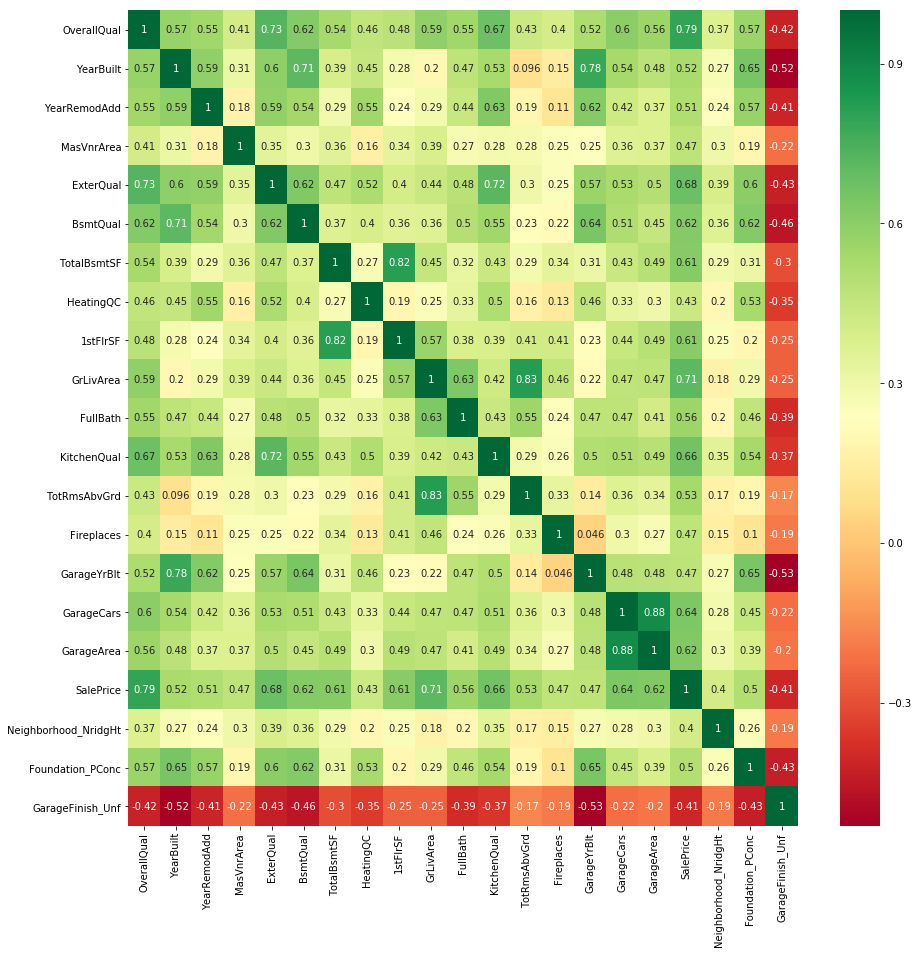

In [40]:
#選んでLasso
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.4]
plt.figure(figsize=(15,15))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [43]:
df_train_select = df_train[top_corr_features].drop(['SalePrice'], axis=1)

X_select = df_train_select.values
y = df_train.loc[:,["SalePrice"]].values

In [138]:
X_select_train,X_select_test,y_train,y_test = train_test_split(X_select,y,test_size=0.3,random_state=0)
                  
model_lasso_select = Lasso(alpha=375)                              
model_lasso_select.fit(X_select_train, y_train)

Lasso(alpha=375, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [139]:
print('train: %3f' % adjusted(model_lasso_select.score(X_select_train, y_train), len(y_train), 20))
print('test : %3f' % adjusted(model_lasso_select.score(X_select_test, y_test), len(y_test), 20))

train: 0.827822
test : 0.714289


/Users/tanakamarunatsurou/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


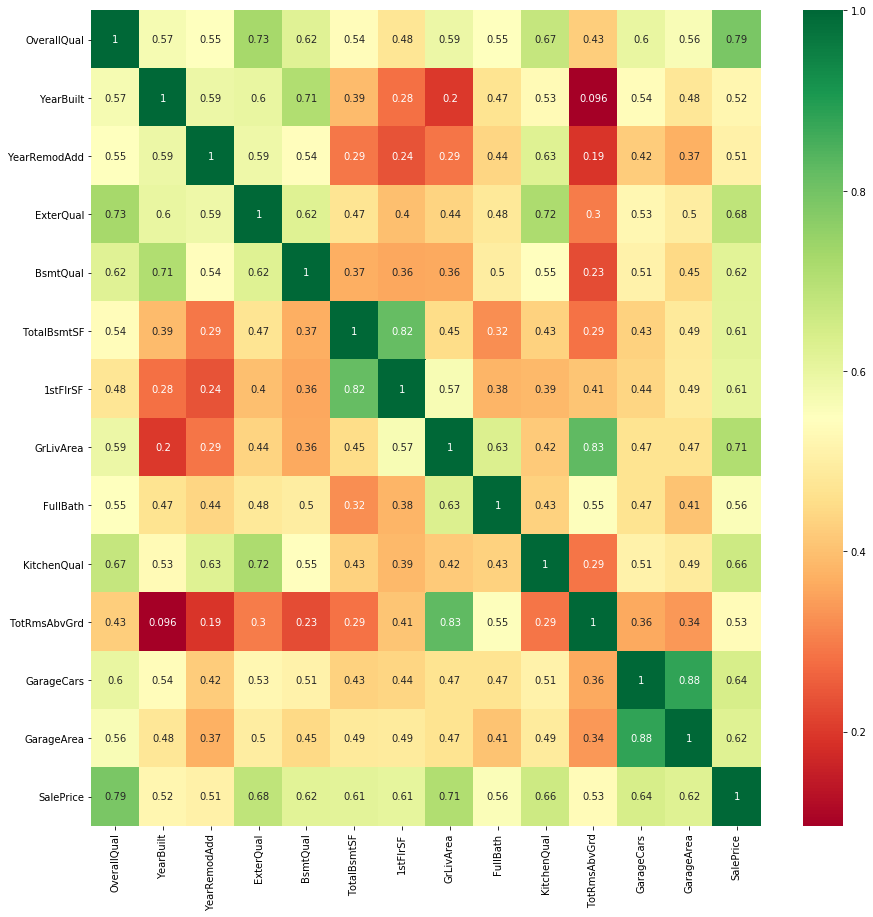

In [64]:
#もっと選んでLasso
corrmat = df_train.corr()
top_corr_features2 = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(15,15))
g = sns.heatmap(df_train[top_corr_features2].corr(),annot=True,cmap="RdYlGn")

In [114]:
df_train_select2 = df_train[top_corr_features2].drop(['SalePrice'], axis=1)

X_select2 = df_train_select2.values
y = df_train.loc[:,["SalePrice"]].values

In [119]:
X_select2_train,X_select2_test,y_train,y_test = train_test_split(X_select2,y,test_size=0.3,random_state=0)
                  
model_lasso_select2 = Lasso(alpha=50)                              
model_lasso_select2.fit(X_select2_train, y_train)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
print('train: %3f' % adjusted(model_lasso_select2.score(X_select2_train, y_train), len(y_train), 1))
print('test : %3f' % adjusted(model_lasso_select2.score(X_select2_test, y_test), len(y_test), 1))

train: 0.818443
test : 0.715624


In [121]:
from sklearn.linear_model import Ridge                      
model_ridge = Ridge(alpha=30)                             
model_ridge.fit(X_select2_train, y_train)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [122]:
print('train: %3f' % adjusted(model_ridge.score(X_select2_train, y_train), len(y_train), 1))
print('test : %3f' % adjusted(model_ridge.score(X_select2_test, y_test), len(y_test), 1))

train: 0.818153
test : 0.715486


In [123]:
from sklearn.linear_model import ElasticNet              
model_en= ElasticNet(alpha=375, l1_ratio=0.5)         
model_en.fit(X_select2_train, y_train) 

ElasticNet(alpha=375, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [124]:
print('train: %3f' % adjusted(model_en.score(X_select2_train, y_train), len(y_train), 1))
print('test : %3f' % adjusted(model_en.score(X_select2_test, y_test), len(y_test), 1))

train: 0.761513
test : 0.628330


In [127]:
print(top_corr_features)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice', 'Neighborhood_NridgHt',
       'Foundation_PConc', 'GarageFinish_Unf'],
      dtype='object')


In [130]:
#線形回帰
df_train_select3 = df_train.loc[:,['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea']]

X_select3 = df_train_select3.values
y = df_train.loc[:,["SalePrice"]].values

In [131]:
X_select3_train,X_select3_test,y_train,y_test = train_test_split(X_select3,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X_select3_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [140]:
print('train: %3f' % adjusted(model_lin.score(X_select3_train, y_train), len(y_train), 4))
print('test : %3f' % adjusted(model_lin.score(X_select3_test, y_test), len(y_test), 4))

train: 0.782899
test : 0.688280


In [133]:
#2次関数
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)   
X_quad = quad.fit_transform(X_select3) 

X_quad_train,X_quad_test,y_train,y_test = train_test_split(X_quad,y,test_size=0.3,random_state=0)
model_quad = LinearRegression()
model_quad.fit(X_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
print('train: %3f' % adjusted(model_quad.score(X_quad_train, y_train), len(y_train), 5))
print('test : %3f' % adjusted(model_quad.score(X_quad_test, y_test), len(y_test), 5))

train: 0.832577
test : 0.853119


In [142]:
#3次関数
from sklearn.preprocessing import PolynomialFeatures
cubic = PolynomialFeatures(degree=3)   
X_cubic = cubic.fit_transform(X_select3) 

X_cubic_train,X_cubic_test,y_train,y_test = train_test_split(X_cubic,y,test_size=0.3,random_state=0)
model_cubic = LinearRegression()
model_cubic.fit(X_cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [143]:
print('train: %3f' % adjusted(model_cubic.score(X_cubic_train, y_train), len(y_train), 6))
print('test : %3f' % adjusted(model_cubic.score(X_cubic_test, y_test), len(y_test), 6))

train: 0.863280
test : -1.167690


In [144]:
df_test = pd.read_csv('unpro_test.csv')
df_select = df_test.loc[:,['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea']]
df_select.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea
0,5,1961,882.0,896
1,6,1958,1329.0,1329
2,5,1997,928.0,1629
3,6,1998,926.0,1604
4,8,1992,1280.0,1280


In [145]:
#欠損値の概要把握
total = df_select.isnull().sum().sort_values(ascending=False)
percent = (df_select.isnull().sum()/df_select.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
TotalBsmtSF,1,0.000685
GrLivArea,0,0.000000
YearBuilt,0,0.000000
OverallQual,0,0.000000


In [146]:
df_select.describe()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea
count,1459.000000,1459.000000,1458.000000,1459.000000
mean,6.078821,1971.357779,1046.117970,1486.045922
std,1.436812,30.390071,442.898624,485.566099
min,1.000000,1879.000000,0.000000,407.000000
25%,5.000000,1953.000000,784.000000,1117.500000
50%,6.000000,1973.000000,988.000000,1432.000000
75%,7.000000,2001.000000,1305.000000,1721.000000
max,10.000000,2010.000000,5095.000000,5095.000000


In [148]:
df_select["TotalBsmtSF"] = df_select["TotalBsmtSF"].fillna(df_select["TotalBsmtSF"].mean())

In [149]:
total = df_select.isnull().sum().sort_values(ascending=False)
percent = (df_select.isnull().sum()/df_select.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
GrLivArea,0,0.0
TotalBsmtSF,0,0.0
YearBuilt,0,0.0
OverallQual,0,0.0


In [150]:
sub = pd.DataFrame()
sub['Id'] = df_test["Id"]
X_test = df_select.values
quad = PolynomialFeatures(degree=2)   
test_quad = quad.fit_transform(X_test) 
sub['SalePrice'] = model_quad.predict(test_quad)
sub.to_csv('submission1710.csv',index=False)